<a href="https://colab.research.google.com/github/Sxbxn/Data_Mining-Study/blob/main/Decision_Tree/DT_PlayTennis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image
import pandas as pd
import numpy as np
import pydotplus 
import os

In [27]:
url = 'https://raw.githubusercontent.com/Sxbxn/Data_Mining-Study/main/data/PlayTennis.csv'
tennis_data = pd.read_csv(url)
print(tennis_data)

     Outlook Temperature Humidity    Wind PlayTennis
0      Sunny         Hot     High    Weak         No
1      Sunny         Hot     High  Strong         No
2   Overcast         Hot     High    Weak        Yes
3       Rain        Mild     High    Weak        Yes
4       Rain        Cool   Normal    Weak        Yes
5       Rain        Cool   Normal  Strong         No
6   Overcast        Cool   Normal  Strong        Yes
7      Sunny        Mild     High    Weak         No
8      Sunny        Cool   Normal    Weak        Yes
9       Rain        Mild   Normal    Weak        Yes
10     Sunny        Mild   Normal  Strong        Yes
11  Overcast        Mild     High  Strong        Yes
12  Overcast         Hot   Normal    Weak        Yes
13      Rain        Mild     High  Strong         No


In [29]:
# 데이터 전처리
tennis_data.Outlook = tennis_data.Outlook.replace('Sunny',0)
tennis_data.Outlook = tennis_data.Outlook.replace('Overcast', 1)
tennis_data.Outlook = tennis_data.Outlook.replace('Rain',2)

tennis_data.Temperature = tennis_data.Temperature.replace('Hot',3)
tennis_data.Temperature = tennis_data.Temperature.replace('Mild',4)
tennis_data.Temperature = tennis_data.Temperature.replace('Cool',5)

tennis_data.Humidity = tennis_data.Humidity.replace('High',6)
tennis_data.Humidity = tennis_data.Humidity.replace('Normal',7)

tennis_data.Wind = tennis_data.Wind.replace('Weak',8)
tennis_data.Wind = tennis_data.Wind.replace('Strong',9)

tennis_data.PlayTennis = tennis_data.PlayTennis.replace('No',10)
tennis_data.PlayTennis = tennis_data.PlayTennis.replace('Yes',11)

print(tennis_data)

    Outlook  Temperature  Humidity  Wind  PlayTennis
0         0            3         6     8          10
1         0            3         6     9          10
2         1            3         6     8          11
3         2            4         6     8          11
4         2            5         7     8          11
5         2            5         7     9          10
6         1            5         7     9          11
7         0            4         6     8          10
8         0            5         7     8          11
9         2            4         7     8          11
10        0            4         7     9          11
11        1            4         6     9          11
12        1            3         7     8          11
13        2            4         6     9          10


In [37]:
X = np.array(pd.DataFrame(tennis_data, columns=['Outlook','Temperature', 'Humidity', 'Wind']))

In [38]:
y = np.array(pd.DataFrame(tennis_data, columns=['PlayTennis']))

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [40]:
X_train

array([[0, 4, 7, 9],
       [1, 3, 6, 8],
       [1, 3, 7, 8],
       [1, 5, 7, 9],
       [2, 4, 7, 8],
       [2, 5, 7, 8],
       [1, 4, 6, 9],
       [0, 3, 6, 9],
       [2, 4, 6, 9],
       [2, 4, 6, 8]])

In [41]:
X_test

array([[0, 5, 7, 8],
       [0, 3, 6, 8],
       [2, 5, 7, 9],
       [0, 4, 6, 8]])

In [42]:
y_train

array([[11],
       [11],
       [11],
       [11],
       [11],
       [11],
       [11],
       [10],
       [10],
       [11]])

In [43]:
y_test

array([[11],
       [10],
       [10],
       [10]])

In [44]:
dt_clf = DecisionTreeClassifier()

In [46]:
dt_clf = dt_clf.fit(X_train, y_train)

In [47]:
dt_prediction = dt_clf.predict(X_test)

In [49]:
from sklearn.tree import export_graphviz

In [50]:
feature_names = tennis_data.columns.tolist()
feature_names = feature_names[0:4]

In [51]:
target_name = np.array(['Play No', 'Play Yes'])

In [52]:
dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                  feature_names = feature_names,
                                  class_names = target_name,
                                  filled = True, rounded = True,
                                  special_characters = True)

In [54]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

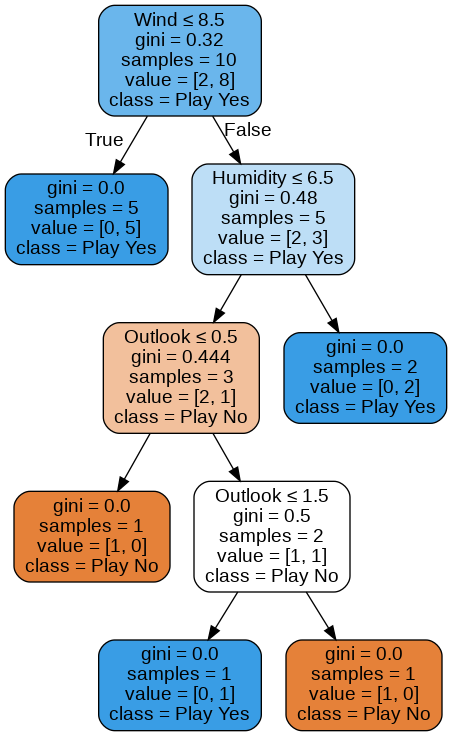

In [55]:
Image(dt_graph.create_png())